In [2]:
import pandas as pd
import numpy as np

# Datos
from scipy import stats 
import copy
import pingouin as pg

# Análisis de Factores
from sklearn.decomposition import FactorAnalysis

# Visualizaciones
import plotly.express as px
import seaborn as sb

pd.DataFrame.iteritems = pd.DataFrame.items

In [3]:
PATH = '/home/chay/CDMX/'
datos  = pd.read_csv(PATH+'datos_delegaciones_cuidados.csv')
datos.head()

,Alcaldia,Poblacion_Total,Poblacion_Mayores_65,Mujeres_Ocupadas,Mujeres_Inactivas_Economicamente,Poblacion_Objetivo,Establecimientos_Mayores_65,Establecimientos_Cuidados_Directos,Establecimientos_Cuidados_Indirectos,Total_Establecimientos,Tasa_Demanda_Potencial_Mayores_65,Tasa_Demanda_Potencial_Mujeres_Ocupadas,Tasa_Demanda_Potencial_Mujeres_Inactivas,Tasa_Demanda_Potencial_Total,Total_Poblacion_Requiere_Cuidados,Total_Poblacion_Requiere_Cuidados_65,Poblacion_en_Probreza,Estacionamientos,Areas_verdes
0,ALVARO OBREGÓN,"759,137","83,813","190,87","150,46","227,217",16,75,444,519,"5,238.31",367.76,289.90,437.80,29.9%,11.0%,37.7%,107,250
1,AZCAPOTZALCO,"432,205","54,863","107,939","89,796","133,559",9,40,269,309,"6,095.89",349.32,290.60,432.23,30.9%,12.7%,24.2%,67,111
2,BENITO JUÁREZ,"434,153","61,593","132,702","76,285","120,537",21,77,246,323,"2,933",410.84,236.18,373.18,27.8%,14.2%,7.9%,287,64
3,COYOACÁN,"614,447","90,448","156,658","130,022","195,223",25,90,374,464,"3,617.92",337.63,280.22,420.74,31.8%,14.7%,27.1%,109,153
4,CUAJIMALPA DE MORELOS,"217,686","16,76","53,727","41,066","60,321",8,23,137,160,"2,095",335.79,256.66,377.01,27.7%,7.7%,32.5%,36,43


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Alcaldia                                  16 non-null     object 
 1   Poblacion_Total                           16 non-null     object 
 2   Poblacion_Mayores_65                      16 non-null     object 
 3   Mujeres_Ocupadas                          16 non-null     object 
 4   Mujeres_Inactivas_Economicamente          16 non-null     object 
 5   Poblacion_Objetivo                        16 non-null     object 
 6   Establecimientos_Mayores_65               16 non-null     int64  
 7   Establecimientos_Cuidados_Directos        16 non-null     int64  
 8   Establecimientos_Cuidados_Indirectos      16 non-null     object 
 9   Total_Establecimientos                    16 non-null     object 
 10  Tasa_Demanda_Potencial_Mayores_65       

In [5]:
# Limpiar las columnas y convertirlas a numéricas
datos['Poblacion_Total'] = datos['Poblacion_Total'].str.replace(",", "").astype(float)
datos['Poblacion_Mayores_65'] = datos['Poblacion_Mayores_65'].str.replace(",", "").astype(float)
datos['Mujeres_Ocupadas'] = datos['Mujeres_Ocupadas'].str.replace(",", "").astype(float)
datos['Mujeres_Inactivas_Economicamente'] = datos['Mujeres_Inactivas_Economicamente'].str.replace(",", "").astype(float)
datos['Poblacion_Objetivo'] = datos['Poblacion_Objetivo'].str.replace(",", "").astype(float)
datos['Establecimientos_Cuidados_Indirectos'] = datos['Establecimientos_Cuidados_Indirectos'].str.replace(",", "").astype(float)
datos['Total_Establecimientos'] = datos['Total_Establecimientos'].str.replace(",", "").astype(float)
datos['Tasa_Demanda_Potencial_Mayores_65'] = datos['Tasa_Demanda_Potencial_Mayores_65'].str.replace(",", "").astype(float)

# Limpiar columnas con porcentajes y convertirlas a proporciones
datos['Total_Poblacion_Requiere_Cuidados'] = datos['Total_Poblacion_Requiere_Cuidados'].str.replace("%", "").astype(float) / 100
datos['Total_Poblacion_Requiere_Cuidados_65'] = datos['Total_Poblacion_Requiere_Cuidados_65'].str.replace("%", "").astype(float) / 100
datos['Poblacion_en_Probreza'] = datos['Poblacion_en_Probreza'].str.replace("%", "").astype(float) / 100


In [6]:
datos.head()

,Alcaldia,Poblacion_Total,Poblacion_Mayores_65,Mujeres_Ocupadas,Mujeres_Inactivas_Economicamente,Poblacion_Objetivo,Establecimientos_Mayores_65,Establecimientos_Cuidados_Directos,Establecimientos_Cuidados_Indirectos,Total_Establecimientos,Tasa_Demanda_Potencial_Mayores_65,Tasa_Demanda_Potencial_Mujeres_Ocupadas,Tasa_Demanda_Potencial_Mujeres_Inactivas,Tasa_Demanda_Potencial_Total,Total_Poblacion_Requiere_Cuidados,Total_Poblacion_Requiere_Cuidados_65,Poblacion_en_Probreza,Estacionamientos,Areas_verdes
0,ALVARO OBREGÓN,759137.0,83813.0,19087.0,15046.0,227217.0,16,75,444.0,519.0,5238.31,367.76,289.90,437.80,0.299,0.110,0.377,107,250
1,AZCAPOTZALCO,432205.0,54863.0,107939.0,89796.0,133559.0,9,40,269.0,309.0,6095.89,349.32,290.60,432.23,0.309,0.127,0.242,67,111
2,BENITO JUÁREZ,434153.0,61593.0,132702.0,76285.0,120537.0,21,77,246.0,323.0,2933.00,410.84,236.18,373.18,0.278,0.142,0.079,287,64
3,COYOACÁN,614447.0,90448.0,156658.0,130022.0,195223.0,25,90,374.0,464.0,3617.92,337.63,280.22,420.74,0.318,0.147,0.271,109,153
4,CUAJIMALPA DE MORELOS,217686.0,1676.0,53727.0,41066.0,60321.0,8,23,137.0,160.0,2095.00,335.79,256.66,377.01,0.277,0.077,0.325,36,43


# Funciones

In [93]:
def plot_relations(df,dims,color):
    fig = px.scatter_matrix(df,dimensions=dims,
                       title='Diagrama de dispersión multiple',color=color)
    fig.update_layout(
        autosize=False,
        width=800,
        height=800
    )
    fig.show()

In [94]:
# Función para graficar una matriz de correlaciones en un mapa de calor
def plot_heatmap(Corr_mtx):
    sb.set_theme(rc={'figure.figsize':(10,8)})
    sb.heatmap(Corr_mtx, cmap="YlGnBu", annot=False) 

# EDA

In [19]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Alcaldia                                  16 non-null     object 
 1   Poblacion_Total                           16 non-null     float64
 2   Poblacion_Mayores_65                      16 non-null     float64
 3   Mujeres_Ocupadas                          16 non-null     float64
 4   Mujeres_Inactivas_Economicamente          16 non-null     float64
 5   Poblacion_Objetivo                        16 non-null     float64
 6   Establecimientos_Mayores_65               16 non-null     int64  
 7   Establecimientos_Cuidados_Directos        16 non-null     int64  
 8   Establecimientos_Cuidados_Indirectos      16 non-null     float64
 9   Total_Establecimientos                    16 non-null     float64
 10  Tasa_Demanda_Potencial_Mayores_65       

In [16]:
# Se calculan esstadísticos relevantes
np.round(datos.describe(),2)

,Poblacion_Total,Poblacion_Mayores_65,Mujeres_Ocupadas,Mujeres_Inactivas_Economicamente,Poblacion_Objetivo,Establecimientos_Mayores_65,Establecimientos_Cuidados_Directos,Establecimientos_Cuidados_Indirectos,Total_Establecimientos,Tasa_Demanda_Potencial_Mayores_65,Tasa_Demanda_Potencial_Mujeres_Ocupadas,Tasa_Demanda_Potencial_Mujeres_Inactivas,Tasa_Demanda_Potencial_Total,Total_Poblacion_Requiere_Cuidados,Total_Poblacion_Requiere_Cuidados_65,Poblacion_en_Probreza,Estacionamientos,Areas_verdes
count,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00
mean,552307.56,62938.81,125141.56,97899.75,175032.06,14.31,62.44,350.75,411.19,4788.59,345.77,272.76,416.98,0.30,0.11,0.33,141.88,113.38
std,434042.42,44583.54,103679.79,95828.91,129470.92,8.35,30.94,259.55,288.74,2302.24,31.53,22.98,26.25,0.01,0.02,0.13,194.25,83.18
min,41447.00,1676.00,1009.00,7477.00,46756.00,3.00,20.00,94.00,114.00,2034.65,297.52,236.18,372.78,0.28,0.07,0.08,9.00,12.00
25%,356140.25,37920.50,57551.25,37796.75,117023.25,8.00,39.50,235.50,286.25,2923.80,330.58,253.88,409.55,0.29,0.09,0.25,38.25,58.00
50%,438165.50,54548.50,109781.50,85059.50,133116.00,11.50,57.50,262.50,319.00,4470.56,342.32,278.50,415.46,0.30,0.11,0.33,87.00,79.50
75%,635817.25,76495.25,156353.50,102194.00,198678.75,20.25,80.00,384.25,474.00,5881.77,355.04,286.47,433.62,0.31,0.12,0.42,125.75,159.50
max,1835486.00,174312.00,424408.00,374587.00,563155.00,30.00,132.00,1107.00,1239.00,9814.80,410.84,311.40,462.28,0.32,0.15,0.55,799.00,293.00


In [36]:
datos_z = copy.deepcopy(datos[datos.columns[1:]])
datos_z = stats.zscore(datos_z)
# Se corrige el índice de los datos
datos_z = datos_z.reset_index(drop=True)

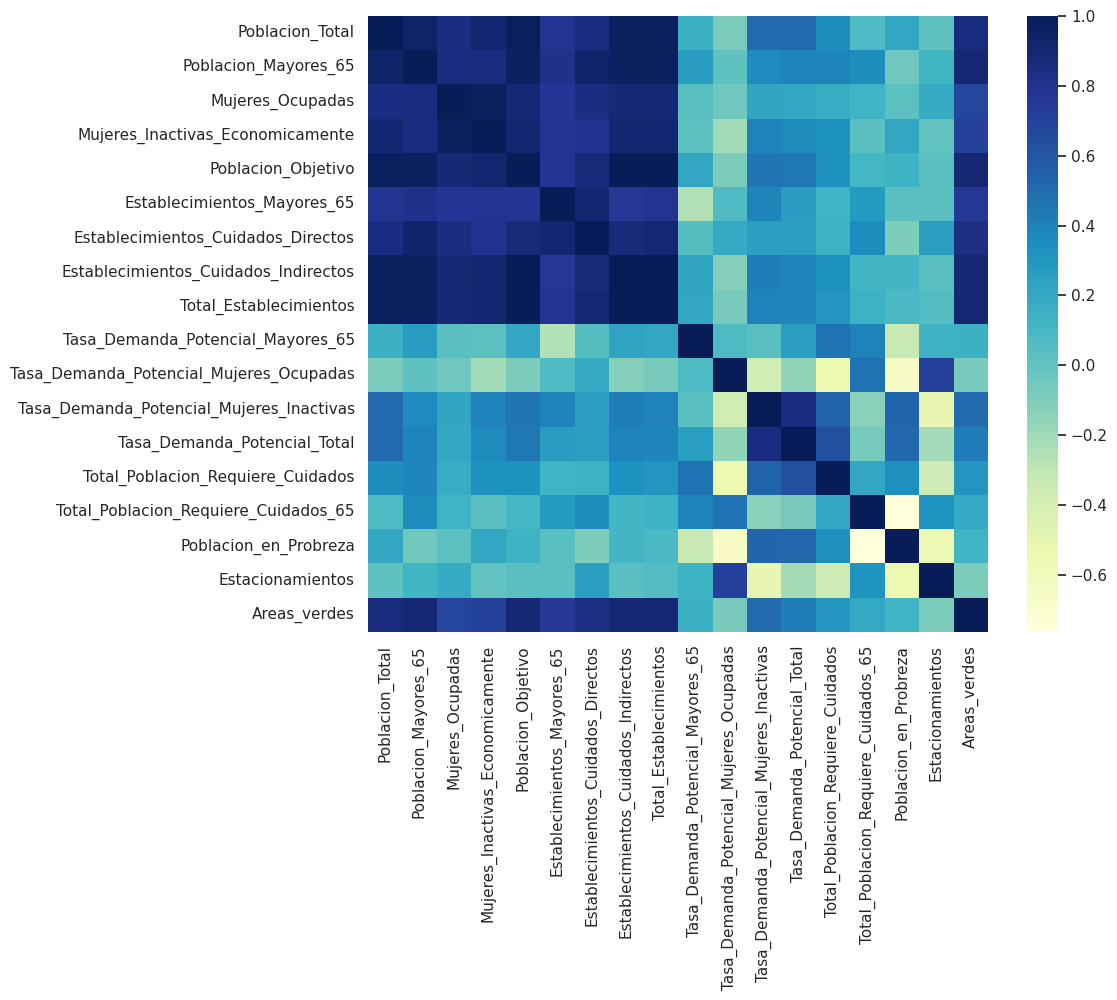

In [32]:
plot_heatmap(datos_z.corr())

In [96]:
plot_relations(datos_z,datos_z.columns[1:5],datos['Alcaldia'])

In [97]:
plot_relations(datos_z,datos_z.columns[5:9],datos['Alcaldia'])

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import matplotlib.pyplot as plt

In [99]:
columns_int = datos_z.columns.drop('Total_Poblacion_Requiere_Cuidados_65')

In [100]:
# Decision Tree CART
CART_model = DecisionTreeClassifier(random_state=42)
CART_model.fit(datos_z, np.reshape(datos['Alcaldia'],16))

DecisionTreeClassifier(random_state=42)

In [101]:
CART_vars = CART_model.feature_importances_


In [102]:
CART_vars

array([0.06666667, 0.06666667, 0.13333333, 0.06666667, 0.13333333,
       0.2       , 0.        , 0.        , 0.06666667, 0.06666667,
       0.        , 0.        , 0.        , 0.        , 0.06666667,
       0.13333333, 0.        , 0.        ])

In [103]:
n_features = 18

In [104]:
CART_vars.shape

(18,)

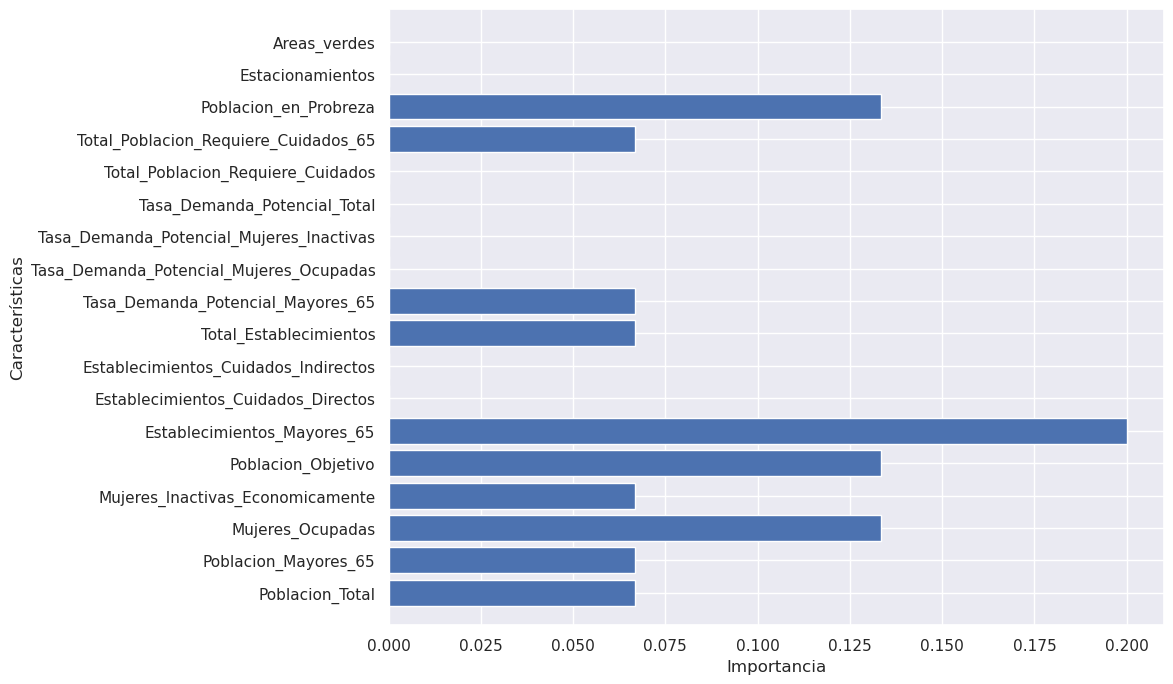

In [105]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.barh(np.arange(n_features), CART_vars, align='center')
plt.yticks(np.arange(n_features), datos.columns[1:])
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.ylim(-1, n_features)
plt.show()

In [106]:
# Random Forest
RF_model = RandomForestClassifier(n_estimators=100,min_samples_split=4, n_jobs=-1, random_state=42)
RF_model.fit(datos_z, np.reshape(datos['Alcaldia'],16))
RF_vars = np.mean([tree.feature_importances_ for tree in RF_model.estimators_], axis=0)
RF_vars.shape

(18,)

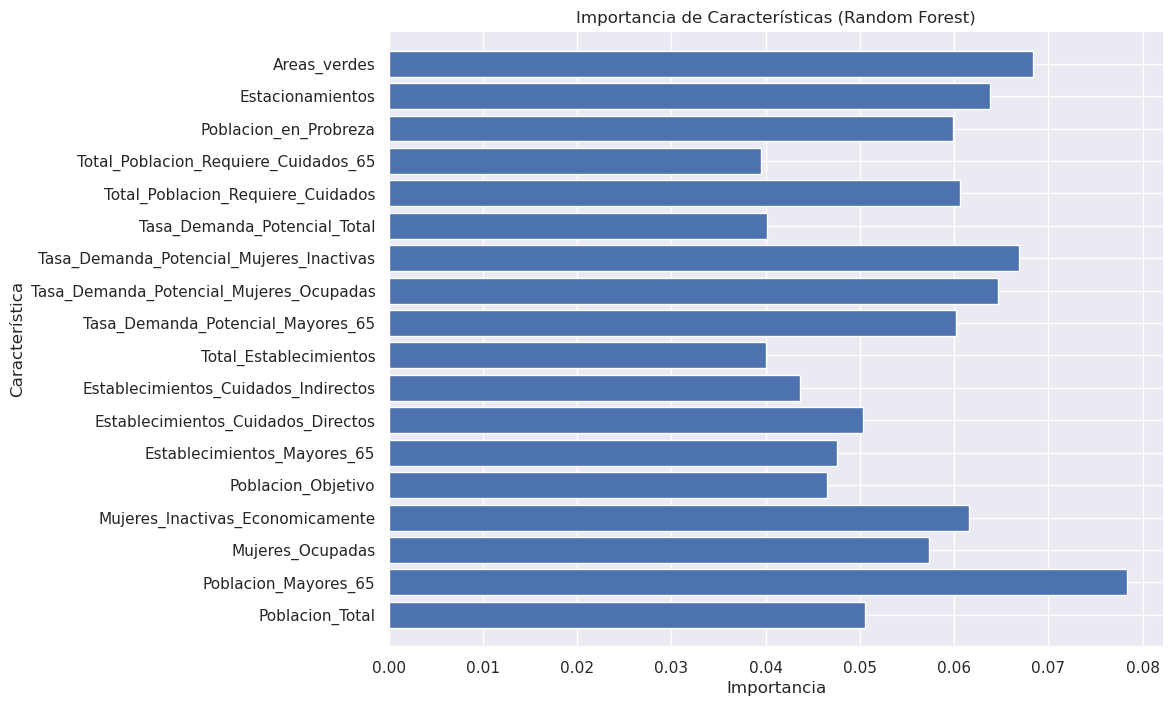

In [107]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.title('Importancia de Características (Random Forest)')
plt.barh(np.arange(n_features), RF_vars, align='center')
plt.yticks(np.arange(n_features), datos.columns[1:])
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.ylim(-1, n_features)
plt.show()

In [108]:
# Adaboost classifier con Decision Tree como base
ABOOST_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100,algorithm="SAMME.R", learning_rate=1, random_state=42)
ABOOST_model.fit(datos_z, np.reshape(datos['Alcaldia'],16))

Adaboost_vars = np.mean([tree.feature_importances_ for tree in ABOOST_model.estimators_], axis=0)
Adaboost_vars.shape

(18,)

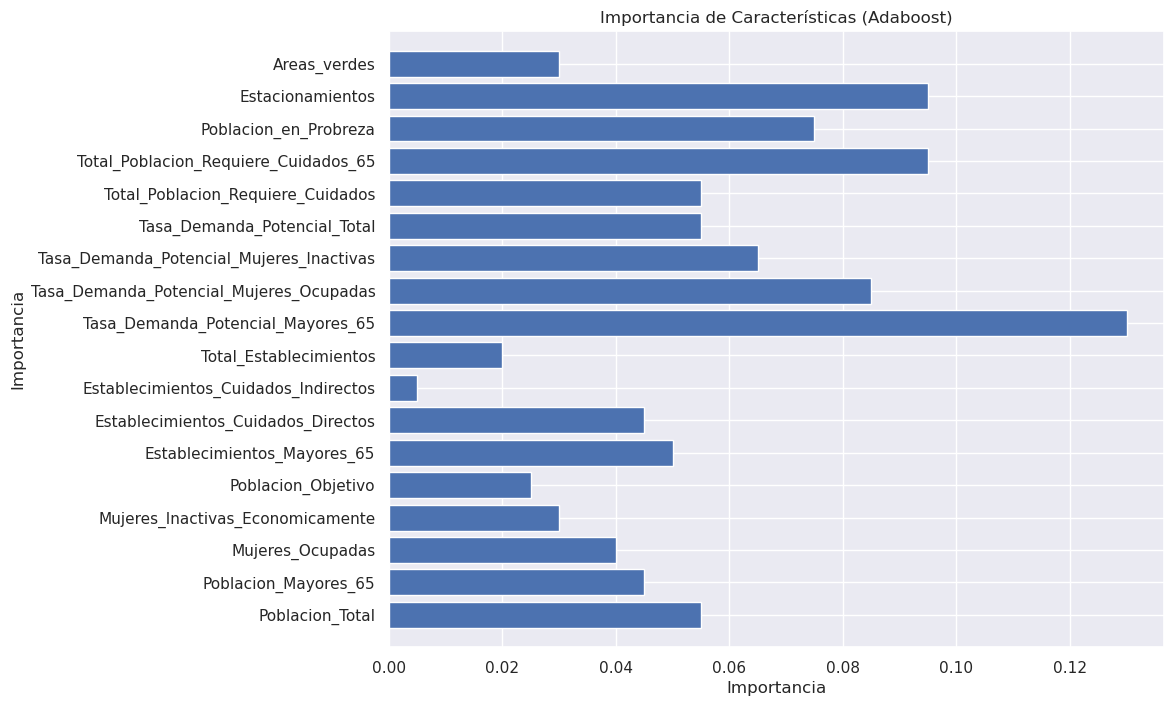

In [109]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.title('Importancia de Características (Adaboost)')
plt.barh(np.arange(n_features), Adaboost_vars, align='center')
plt.yticks(np.arange(n_features), datos.columns[1:])
plt.xlabel("Importancia")
plt.ylabel("Importancia")
plt.ylim(-1, n_features)
plt.show()

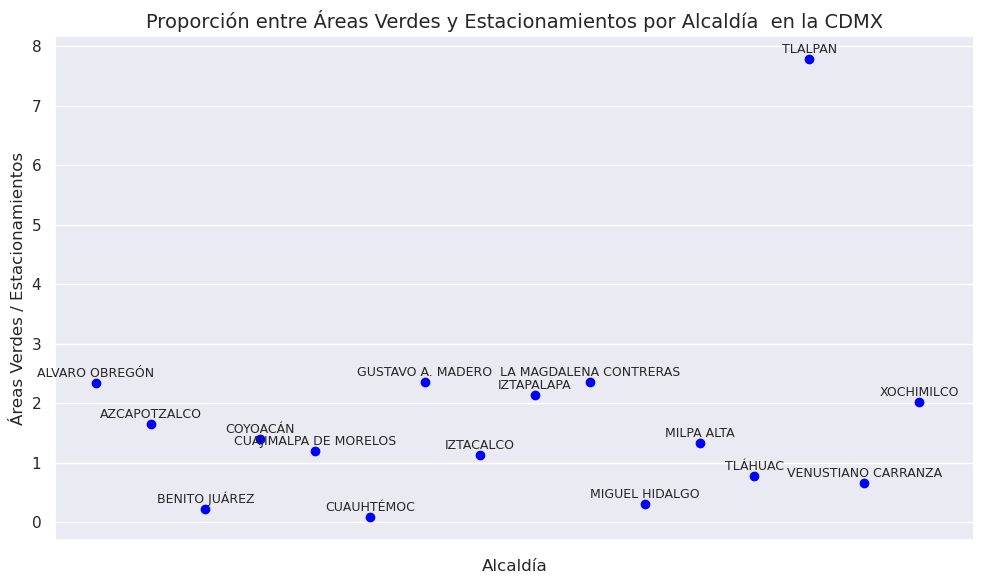

In [110]:
import matplotlib.pyplot as plt

# Data
alcaldias = ["ALVARO OBREGÓN", "AZCAPOTZALCO", "BENITO JUÁREZ", "COYOACÁN", "CUAJIMALPA DE MORELOS", 
             "CUAUHTÉMOC", "GUSTAVO A. MADERO", "IZTACALCO", "IZTAPALAPA", "LA MAGDALENA CONTRERAS", 
             "MIGUEL HIDALGO", "MILPA ALTA", "TLÁHUAC", "TLALPAN", "VENUSTIANO CARRANZA", "XOCHIMILCO"]

areas_estacionamientos_ratio = [2.3364, 1.6567, 0.2230, 1.4037, 1.1944, 0.0801, 2.3571, 
                                1.1224, 2.1387, 2.3636, 0.3069, 1.3333, 0.7763, 7.7826, 
                                0.6557, 2.0256]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(alcaldias, areas_estacionamientos_ratio, color='blue')

# Add labels for alcaldías
for i, text in enumerate(alcaldias):
    plt.text(i, areas_estacionamientos_ratio[i] + 0.1, text, fontsize=9, ha='center')

# Title and labels
plt.title('Proporción entre Áreas Verdes y Estacionamientos por Alcaldía  en la CDMX', fontsize=14)
plt.xlabel('Alcaldía', fontsize=12)
plt.ylabel('Áreas Verdes / Estacionamientos', fontsize=12)
plt.xticks('')

# Show plot
plt.tight_layout()
plt.show()